# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



### Описание проекта
    Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт  
    погашения кредита в срок. 
    Входные данные от банка — статистика о платёжеспособности клиентов.
    Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает 
    способность потенциального заёмщика вернуть кредит банку.

### Описание данных
    children — количество детей в семье
    days_employed — общий трудовой стаж в днях
    dob_years — возраст клиента в годах
    education — уровень образования клиента
    education_id — идентификатор уровня образования
    family_status — семейное положение
    family_status_id — идентификатор семейного положения
    gender — пол клиента
    income_type — тип занятости
    debt — имел ли задолженность по возврату кредитов
    total_income — ежемесячный доход
    purpose — цель получения кредита

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка данных
try:
    data = pd.read_csv('data_4.csv')
except:
    data = pd.read_csv('https://... ')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
# проверка совпадений значений NaN  в признаках 'days_employed', 'total_income' по строкам
data.loc[(data['days_employed'].isna()) & (data['total_income'].isna()), ['days_employed', 'total_income']]

,days_employed,total_income
12,NaN,NaN
26,NaN,NaN
29,NaN,NaN
41,NaN,NaN
55,NaN,NaN
...,...,...
21489,NaN,NaN
21495,NaN,NaN
21497,NaN,NaN
21502,NaN,NaN


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [7]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [8]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [9]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [10]:
# распределение типов занятости 
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [17]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [18]:
data.duplicated().sum()

71

In [19]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [25]:
# общая информация по дата фрейму для оценки данных после предобработки
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   children               21331 non-null  int64  
 1   days_employed          21331 non-null  float64
 2   dob_years              21331 non-null  int64  
 3   education              21331 non-null  object 
 4   education_id           21331 non-null  int64  
 5   family_status          21331 non-null  object 
 6   family_status_id       21331 non-null  int64  
 7   gender                 21331 non-null  object 
 8   income_type            21331 non-null  object 
 9   debt                   21331 non-null  int64  
 10  total_income           21331 non-null  int32  
 11  purpose                21331 non-null  object 
 12  total_income_category  21331 non-null  object 
 13  purpose_category       21331 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(7)
memory us

In [26]:
# вывод первых 5 строк для оценки данных после предобработки
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


In [27]:
# общая оценка оплаты по кредиту по всем данным и категориям
total_debt_0 = data[data['debt'] == 0]['debt'].count()
total_debt_1 = data[data['debt'] == 1]['debt'].count()

#print('не было задолжности =',total_debt_0, 'в процентах =', round(total_debt_0 / len(data) * 100,2))
print(f'задержали оплату = {total_debt_1}, в среднем по всей выборке = {round(total_debt_1 / len(data) * 100,2)}%')

задержали оплату = 1732, в среднем по всей выборке = 8.12%


In [28]:
# общая функция для построения сводной таблицы для вывода данных: Количество кредитов, Количество должников, Процент должников 
# по категориям

def distribution_debt_by_category(row):
    '''
    distribution_debt_by_category - распределение задолжности по категории
    функция:
    - принимает на вход ряд dataframe сгруппированный по указанной категории
    - возвращет распределение в категории: Количество кредитов, Количество должников, Процент должников 
    '''
    result = {
        'Количество кредитов': row['debt'].count(),
        'Количество должников': round(row['debt'].sum()),
        'Процент должников': round(row['debt'].sum() / row['debt'].count() * 100, 2)      
    }
    return pd.Series(result)


In [29]:
# общая функция для построения bar chart по сводной таблице по заданой категории

def bar_chart_distribution_debt_by_category(data, column='Процент должников', x=str):
    '''
    bar_chart_distribution_debt_by_category - гистограмма распределение задолжности по категории
     функция:
    - принимает на вход сводную таблицу по категории, колонку по которой строиться гистограмма, по умолчанию 'Процент должников'
    - возвращет гистограму количества значений в категории по указанной колонке, по умолчанию 'Процент должников'
    '''
    data[column].plot(kind='bar', grid=True, figsize=(14,4), rot=0, ylim=(0, 12), fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xlabel(x, fontsize=12)
    plt.title('bar chart по категории '+x, fontsize=14, fontweight='bold');
    

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [30]:
# сводной таблица по категории Количество детей 
data_children_category = data.groupby(['children']).apply(distribution_debt_by_category)
data_children_category.reset_index()

,children,Количество кредитов,Количество должников,Процент должников
0,0,14091.0,1063.0,7.54
1,1,4808.0,444.0,9.23
2,2,2052.0,194.0,9.45
3,3,330.0,27.0,8.18
4,4,41.0,4.0,9.76
5,5,9.0,0.0,0.00


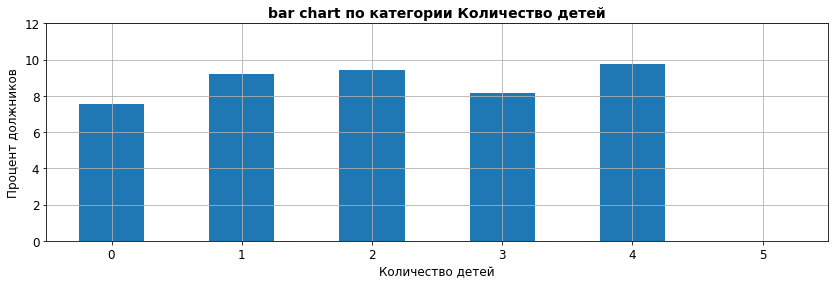

In [31]:
# bar chart по категории Количество детей 
bar_chart_distribution_debt_by_category(data_children_category, x='Количество детей')

**Вывод:** 
зависимость между семейным статусом и возвратом кредита в срок - есть:
 - процент заемщиков, у которых была задолжность по оплату кредита меняется от 7.54% до 9.76%; 
 - лучше оплачивают кредит заемщики из категории "детей=0" и "детей=3" - 7.54% и 8.18% не оплаченных вовремя соответственно;
 - хуже оплаиваю кредит категории с 1, 2, 4 детьми - 9.23%, 9.45%, 9.76% соответственно; 
 - при наличии 5 детей, процент оплаты 100%, но это м.б. вызвано малой выборкой по этой категории в данной базе данных, всего 9 человек в категории, при общей выборке 21 331 человек;

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [32]:
#  сводной таблица по категории Семейное положение 
data_family_category = data.groupby(['family_status']).apply(distribution_debt_by_category)
data_family_category.reset_index()

,family_status,Количество кредитов,Количество должников,Процент должников
0,Не женат / не замужем,2796.0,273.0,9.76
1,в разводе,1189.0,84.0,7.06
2,вдовец / вдова,951.0,63.0,6.62
3,гражданский брак,4134.0,385.0,9.31
4,женат / замужем,12261.0,927.0,7.56


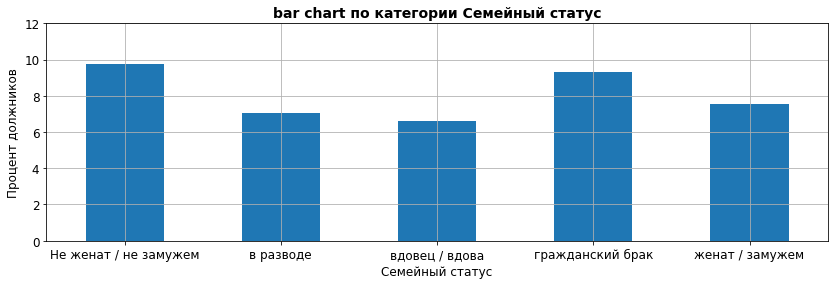

In [33]:
# bar chart по категории Семейное положение 
bar_chart_distribution_debt_by_category(data_family_category, x='Семейный статус')

**Вывод:** зависимости между Семейным статусом и возвратом кредита в срок - есть:
 - процент заемщиков, у которых была задолжность по оплату кредита меняется от 6.62% до 9.76%; 
 - лучше оплата в категория "вдова/вдовец", "в разводе", "женат/замужем"- 6.62%, 7.02%, 7.56% не оплаченных вовремя;
 - хуже оплачиваю кредит в категориях "гражанский брак" и "не женат/не замужем - 9.31% и 9.76% соответственно; 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**заданные в условии диапазоны дохода**
   - 0–30000 — 'E';
   - 30001–50000 — 'D';
   - 50001–200000 — 'C';
   - 200001–1000000 — 'B';
   - 1000001 и выше — 'A'.

In [34]:
# сводной таблица по категории Уровень дохода
data_incom_category = data.groupby(['total_income_category']).apply(distribution_debt_by_category)
data_incom_category.reset_index()

,total_income_category,Количество кредитов,Количество должников,Процент должников
0,A,25.0,2.0,8.00
1,B,5014.0,354.0,7.06
2,C,15921.0,1353.0,8.50
3,D,349.0,21.0,6.02
4,E,22.0,2.0,9.09


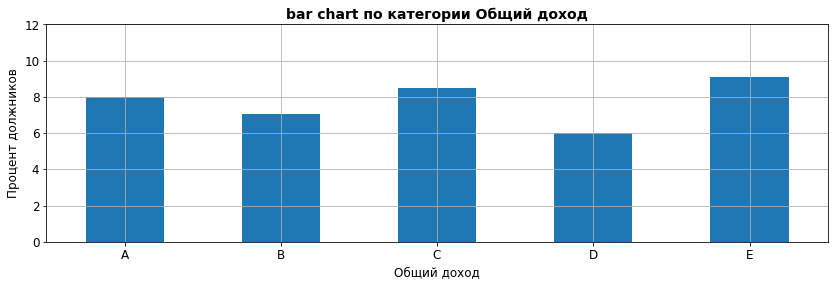

In [35]:
# bar chart по категории Уровень дохода
bar_chart_distribution_debt_by_category(data_incom_category, x='Общий доход')

**Вывод:** зависимости между категорией дохода и возвратом кредита в срок - есть:
 - процент заемщиков, у которых была задолжность по оплату кредита меняется от 6.02% до 9.09%; 
 - лучше оплачивают кредит в категориях D(30001–50000)и B(200001–1000000)- 6.02% и 7.02% не оплаченных вовремя соответственно;
 - хуже оплачиваю кредит в категориях С(50001–200000) и E(0–30000) - 8.50% и 9.09% соответственно; 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [36]:
# сводной таблица по категории Цели кредита
data_purpose_category = data.groupby(['purpose_category']).apply(distribution_debt_by_category)
data_purpose_category.reset_index().sort_values(by='Процент должников')

,purpose_category,Количество кредитов,Количество должников,Процент должников
1,операции с недвижимостью,10751.0,780.0,7.26
3,проведение свадьбы,2313.0,183.0,7.91
2,получение образования,3988.0,369.0,9.25
0,операции с автомобилем,4279.0,400.0,9.35


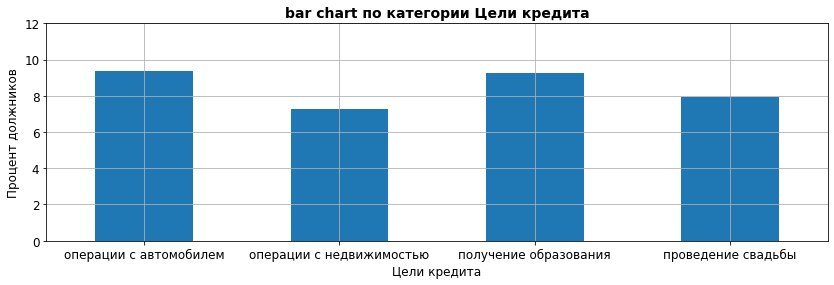

In [37]:
# bar chart по категории Цели кредита
bar_chart_distribution_debt_by_category(data_purpose_category, x='Цели кредита')

**Вывод:** зависимости между Целями кредита и возвратом кредита в срок - есть:

 - процент заемщиков, у которых была задолжность по оплату кредита меняется от 7.26% до 9.35%; 
 - лучше оплачивают кредит в категориях "операции с недвижимостью" и "проведение свадьбы" - 7.26% и 7.91%;
 - хуже оплачиваю кредит в категориях "операции с автомобилем" и "получиение образования" - 9.25% и 9.35% соответственно; 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

Как было определено выше пропуски в данных: 
- в колонках  'days_employed' и 'total incom'
- в одинаковых строках у данных признаков, т.е. по определенным людям
- 2 174 пропуска по каждому признаку

Возможные причины появления пропусков в данных:

    1) технические ошибки при слиянии баз
    2) возможно данные, по количеству стажа и размеру дохода были скрыты, как конфидициальные по данным лицам
    
Для более точного понимания причины пропусков нужно запросить дополнительную информацию у сотрудников банка, отвечающих за сбор, хранение и передачу информации.


#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Ответ:** 
В связи с тем, что в количественных данных могут быть значительные по величине, аномалии/ выбросы  или распределение значений данных м.б. асимметрично, то при расчете среднего значения данные будут давать искажение, поэтому в таких случаях лучше использовать медианные данные. Медиана поможет найти именно тот показатель, который ближе всего к среднему.

### Дополнительные исследования по другим признакам

####  Есть ли зависимость между образованием с возвратом кредита в срок?

In [38]:
# сводноя таблица по категории Образование
data_education_category = data.groupby(['education']).apply(distribution_debt_by_category)
data_education_category.reset_index().sort_values(by='Процент должников')

,education,Количество кредитов,Количество должников,Процент должников
4,ученая степень,6.0,0.0,0.00
0,высшее,5227.0,278.0,5.32
3,среднее,15075.0,1355.0,8.99
2,неоконченное высшее,741.0,68.0,9.18
1,начальное,282.0,31.0,10.99


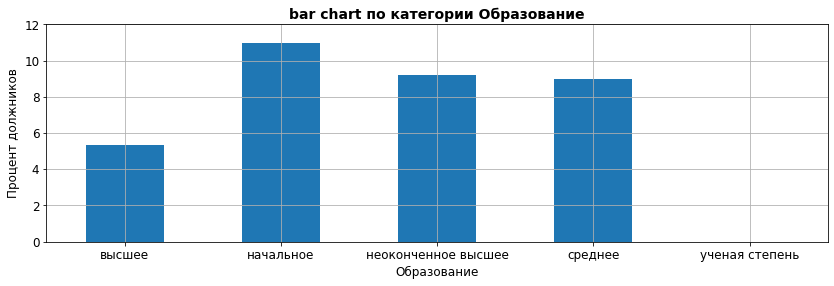

In [39]:
# bar chart по категории Образование
bar_chart_distribution_debt_by_category(data_education_category, x='Образование')

**Вывод:** зависимости между Образованием и Возвратом кредита в срок - есть:

 - процент заемщиков, у которых была задолжность по оплату кредита меняется от 5.32% до 10.99%; 
 - лучше оплачивают кредит в категориях "высшее образование - 5.32%;
 - хуже оплачиваю кредит в категориях "неоконченное высшее" и "начальное" - 9.18 и 10.99% соответстенно; 
 - при наличии ученой степени, процент оплаты 100%, но это м.б. вызвано малой выборкой по этой категории в данной базе данных, всего 6 человек в категории, при общей выборке 21 331 человек;

#### Есть ли зависимость между пол/ gender с возвратом кредита в срок?

In [40]:
# сводноя таблица по категории Пол
data_gender_category = data.groupby(['gender']).apply(distribution_debt_by_category)
data_gender_category.reset_index()

,gender,Количество кредитов,Количество должников,Процент должников
0,F,14092.0,989.0,7.02
1,M,7238.0,743.0,10.27
2,XNA,1.0,0.0,0.00


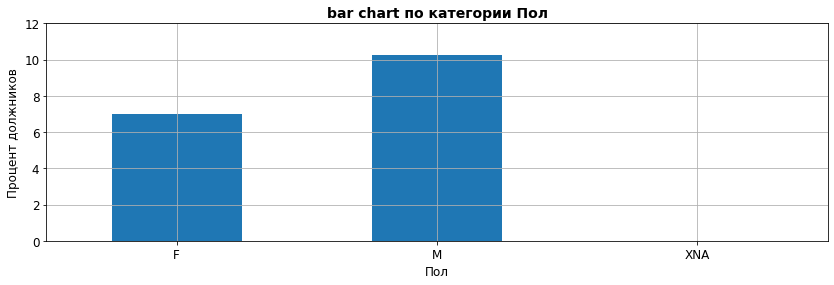

In [41]:
# bar chart по категории Пол
bar_chart_distribution_debt_by_category(data_gender_category, x='Пол')

**Вывод:** зависимости между категорией пол/ gender и возвратом кредита в срок - есть:

  - женщины лучше соблюдают график оплат, чем мужчины, задержка оплаты - 7.02% и 10.27% соответственно

**Есть ли зависимость между типом дохода (income_type) и возвратом кредита в срок?**

In [42]:
# сводноя таблица по категории Тип дохода
data_incom_type_category = data.groupby(['income_type']).apply(distribution_debt_by_category)
data_incom_type_category.reset_index().sort_values(by="Процент должников")

,income_type,Количество кредитов,Количество должников,Процент должников
5,предприниматель,2.0,0.0,0.00
7,студент,1.0,0.0,0.00
4,пенсионер,3812.0,216.0,5.67
2,госслужащий,1451.0,86.0,5.93
3,компаньон,5047.0,374.0,7.41
6,сотрудник,11015.0,1054.0,9.57
0,безработный,2.0,1.0,50.00
1,в декрете,1.0,1.0,100.00


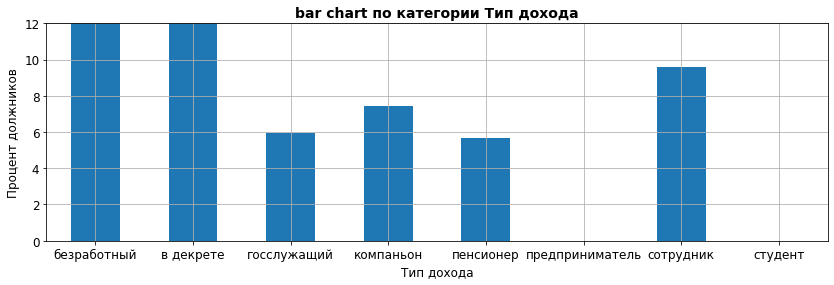

In [43]:
# bar chart по категории Тип дохода
bar_chart_distribution_debt_by_category(data_incom_type_category, x='Тип дохода')

**Вывод:** зависимости между Типом дохода и Возвратом кредита в срок - есть:

 - лучше оплачивают кредит в категориях "пенсионер" и "госслужащий"  - 5.67% и 5.93% соответственно;
 - хуже оплачивают кредит в категории "сотрудник" - 9.57%; 
 - в категориях "безработный", "в декрете", "предприниматель", "студент" выборка небольшая 1-2 человека;

#### Есть ли зависимость между возрастом и возвратом кредита в срок?

In [44]:
# Формирование дополнительной категории по возрасту

def category_age(row):
    if row <=18:
        return 'до 21 лет'
    elif row <=40:
        return '21-40 лет'
    elif row <= 60:
        return '41-60 лет'
    else:
        return 'старше 60 лет'
    
data['category_age'] = data['dob_years'].apply(category_age)

In [45]:
# сводноя таблица по категории Возраст
data_age_category = data.groupby(['category_age']).apply(distribution_debt_by_category)
data_age_category.reset_index()

,category_age,Количество кредитов,Количество должников,Процент должников
0,21-40 лет,9392.0,944.0,10.05
1,41-60 лет,9721.0,679.0,6.98
2,до 21 лет,100.0,8.0,8.00
3,старше 60 лет,2118.0,101.0,4.77


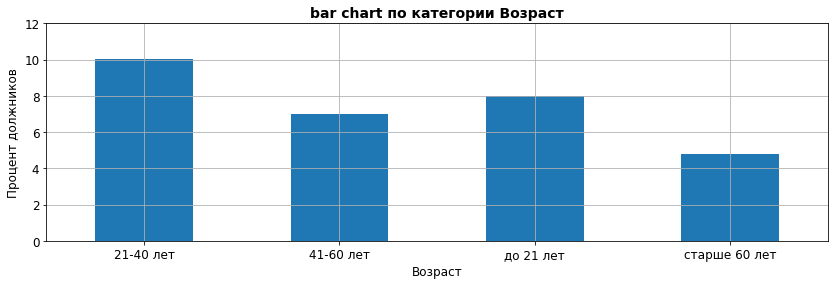

In [46]:
# bar chart по категории Возраст
bar_chart_distribution_debt_by_category(data_age_category, x='Возраст')

**Вывод:** зависимости между категорией возраста и возвратом кредита в срок - есть:
- заемщики в категориях 41-60 лет и после 60 лет значительно лучше соблюдают график оплат, задолжность - 4.77% и 6.98%;
- хуже оплачивают кредит в категориях "21-40 лет" - 10.05%;
- в категории "до 21" выборка не большая - 8 человек;

#### Есть ли зависимость между стажем работы и возвратом кредита в срок?

In [47]:
# отфильтурем аномальные значения опыта работы в днях, они были у категорий: 'пенсионер', 'безработный', 'в декрете', 'студент'
df = data[~data['income_type'].isin(['пенсионер', 'безработный', 'в декрете', 'студент'])].copy()

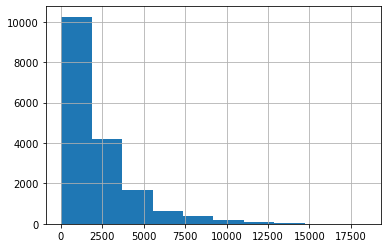

In [48]:
# гистограмма распределения опыта работы в днях
df['days_employed'].hist();

In [49]:
# Формирование дополнительной категории по стажу в годах, т.к. в днями не очень удобно оперировать

def years_employed(row):
    if row <=3650:
        return 'стаж до 10 лет'
    elif row <=7300:
        return 'стаж 11-20 лет'
    elif row <= 10950:
        return 'стаж 21-30 лет'
    elif row <= 14600:
        return 'стаж 31-40 лет'
    elif row <= 18250:
        return 'стаж 41-50 лет'
    else:
        return 'стаж свыше 50 лет'
    
df['category_years_employed'] = df['days_employed'].apply(years_employed)

In [50]:
# сводноя таблица по категории Стаж работы в годах
data_category_days_employed = df.groupby(['category_years_employed']).apply(distribution_debt_by_category)
data_category_days_employed.reset_index().sort_values(by="Процент должников")

,category_years_employed,Количество кредитов,Количество должников,Процент должников
3,стаж 41-50 лет,16.0,0.0,0.00
5,стаж свыше 50 лет,1.0,0.0,0.00
1,стаж 21-30 лет,575.0,22.0,3.83
2,стаж 31-40 лет,160.0,8.0,5.00
0,стаж 11-20 лет,2381.0,132.0,5.54
4,стаж до 10 лет,14382.0,1352.0,9.40


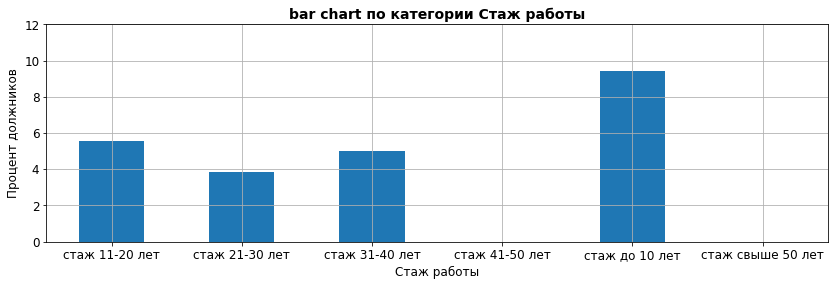

In [51]:
# bar chart по категории Стаж работы
bar_chart_distribution_debt_by_category(data_category_days_employed , x='Стаж работы')

**Вывод:** зависимости между категорией стажа работы и возвратом кредита в срок - есть:
- заемщики в категориях "стаж 21-30", "стаж 31-40","стаж 11-20", лучше соблюдают график оплат, задолжность - 3.83%, 5.00%, 5.54;
- хуже оплачивают кредит в категориях "стаж до 10 лет" - 8.40%;
- в категориях "стаж 41-50", "стаж свыше 50", выборка не большая - 17 человек;

### Шаг 4: общий вывод.

**Общая информация:**

Проблема неоплаченных вовремя кредитов значительна и продолжает расти в поледние годы
- уровень закредитованности граждан вырос до 55% от числа заемщиков;
- в середине 2022 года размер долга российских граждан перед банками перевалил за 25 триллионов рублей, увеличившись за год почти на полтора триллиона;

https://rg.ru/2022/11/28/zajmy-poiut-romansy.html

Для финасовой сферы очень важно улучшать алгоритмы скоринга и оценки заемщика, т.к. даже ошибка в 1% дает 250 млдр.руб. (данные "РГ") по сумме просроченых кредитов по всем финансовым компаниям на 2022г.

**Информация по данным в задании:**

1. Средний процент задолжности по оплате кредита в данной базе данных составлет - 8.12%;

2. Процент оплаченых вовремя кредитов, по заданным в данной задаче категориям меняется, но не везде значительно. Скорее всего зависит не только от заданных категорий;

3. По заданным в задании категориям: семейное положение и количество детей зависимость своевренменой оплаты кредита есть:
 
    3.1. информация по категории Семейный статус:

    - процент заемщиков, у которых была задолжность по оплату кредита меняется от 6.62% до 9.76%;
    - лучше оплата в категория "вдова/вдовец", "в разводе", "женат/замужем"- 6.62%, 7.02%, 7.56% не оплаченных вовремя;
    - хуже оплачиваю кредит в категориях "гражанский брак" и "не женат/не замужем - 9.31% и 9.76% соответственно;
    
    3.2.информация по категории Количество детей:
   
    - процент заемщиков, у которых была задолжность по оплату кредита меняется от 7.54% до 9.76%; 
    - лучше оплачивают кредит заемщики из категории "детей=0" и "детей=3" - 7.54% и 8.18% не оплаченных вовремя соответственно;
    - хуже оплаиваю кредит категории с 1, 2, 4 детьми - 9.23%, 9.45%, 9.76% соответственно; 
    - при наличии 5 детей, процент оплаты 100%, но это м.б. вызвано малой выборкой по этой категории в данной базе данных, всего 9 человек в категории, при общей выборке 21 331 человек;
  


4. Также был проведен анализ зависимости своевременой оплаты кредита по другим категориям : 
    - ежемесячный доход
    - цель получения кредита
    - уровень образования клиента
    - пол клиента
    - тип занятости
    - возраст клиента
    - общий трудовой стаж



5. Для более точного составления модели кредитного скоринга необходимо:

    1) Провести дальнейшее исследования на пересечении 2 или 3 или более рассмотреных категорий, это даст более точную и комплексную оценку;

    2) Необходимо исследовать корреляцию процента оплаченых вовремя кредитов с другими факторами:
    - сумма кредита
    - срок кредита
    - ежемесячный платеж
    - соотношения ежемесячного платежа к сумме ежемесячного дохода
  
  
    
6. Для целей оптимизации хранения и обработки данных нужно разделить таблицу на таблицу фактов и таблицу справочников по категориям, в таблице фактов оставить id категорий;


### пример добавления id по категориии

In [52]:
# добавляем id категории в общую таблицу 
from sklearn.preprocessing import LabelEncoder
data['income_type_id'] = LabelEncoder().fit_transform(data['income_type'])

In [54]:
# создаем таблицу справочник по данной категории
income_type_catalog = data[['income_type', 'income_type_id']].drop_duplicates(keep='first').reset_index(drop=True)
data['income_type_id'] = data['income_type_id'].astype('category')

# удаляем категорию в общей таблице
#data = data.drop(columns='income_type')

In [58]:
income_type_catalog

,income_type,income_type_id
0,сотрудник,6
1,пенсионер,4
2,компаньон,3
3,госслужащий,2
4,безработный,0
5,предприниматель,5
6,студент,7
7,в декрете,1
